#**Importing Libraries**

In [30]:
from pandas_datareader import data
import statsmodels.api as sm
from pylab import rcParams
from pandas.plotting import autocorrelation_plot
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#**Obtain Data from Yahoo Finance**

In [2]:
df = data.DataReader("RELIANCE.NS",
                     data_source = "yahoo",
                     start = "2010-01-28",
                     end = "2020-12-28")
df.isna().any()
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-28,518.311951,507.687622,515.117188,513.705566,15332621.0,468.500488
2010-01-29,520.961792,504.270020,511.600525,518.188110,10768195.0,472.588593
2010-02-01,522.546753,512.913086,513.878967,517.791870,5599315.0,472.227173
2010-02-02,523.215454,507.241852,521.060852,508.826843,7960410.0,464.051117
2010-02-03,519.277771,510.708984,510.708984,512.120605,6946618.0,467.055023


#**Rolling Mean / Average Calculation**
The Rolling Mean is the mean of an n-sized window sliding from the beginning to the end of the data frame.

In [3]:
# Rolling Mean / Moving Average Calculation
df.rolling(window = 5).mean()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-28,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-29,NaN,NaN,NaN,NaN,NaN,NaN
2010-02-01,NaN,NaN,NaN,NaN,NaN,NaN
2010-02-02,NaN,NaN,NaN,NaN,NaN,NaN
2010-02-03,520.862744,508.564313,514.473303,514.126599,9321431.8,468.884479
...,...,...,...,...,...,...
2020-12-22,1997.150000,1930.309985,1982.319995,1966.019995,11957946.0,1966.019995
2020-12-23,1988.450000,1921.300000,1970.719995,1959.479980,12044744.8,1959.479980
2020-12-24,1987.210010,1915.050000,1963.219995,1961.189990,12093168.2,1961.189990


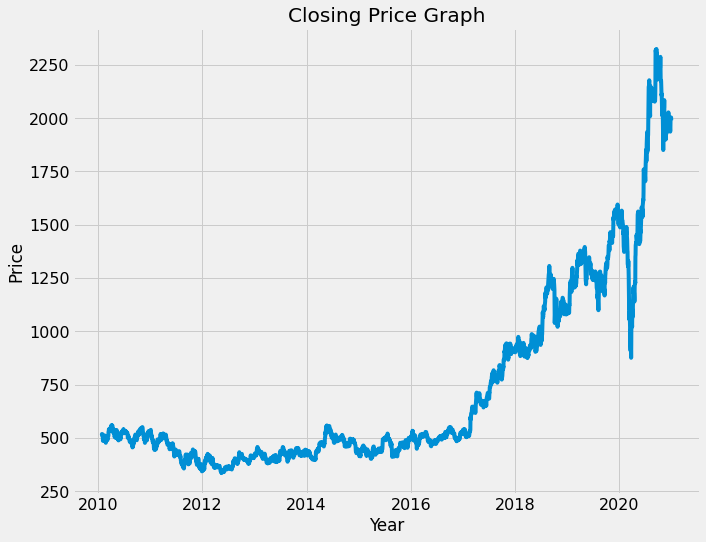

In [36]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(10,8))
plt.xlabel("Year")
plt.ylabel("Price")
plt.title("Closing Price Graph")
plt.plot(df["Close"])

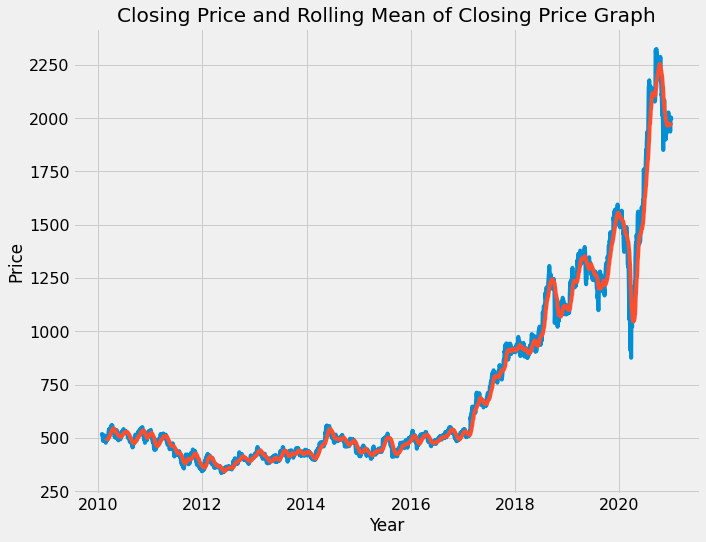

In [37]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(10,8))
plt.xlabel("Year")
plt.ylabel("Price")
plt.title("Closing Price and Rolling Mean of Closing Price Graph")
plt.plot(df["Close"])   #Blue
plt.plot(df.rolling(window = 20).mean()["Close"])   #Orange

#**Stock Volume Line Plot**
Higher Volume of Trades observed after 2020

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


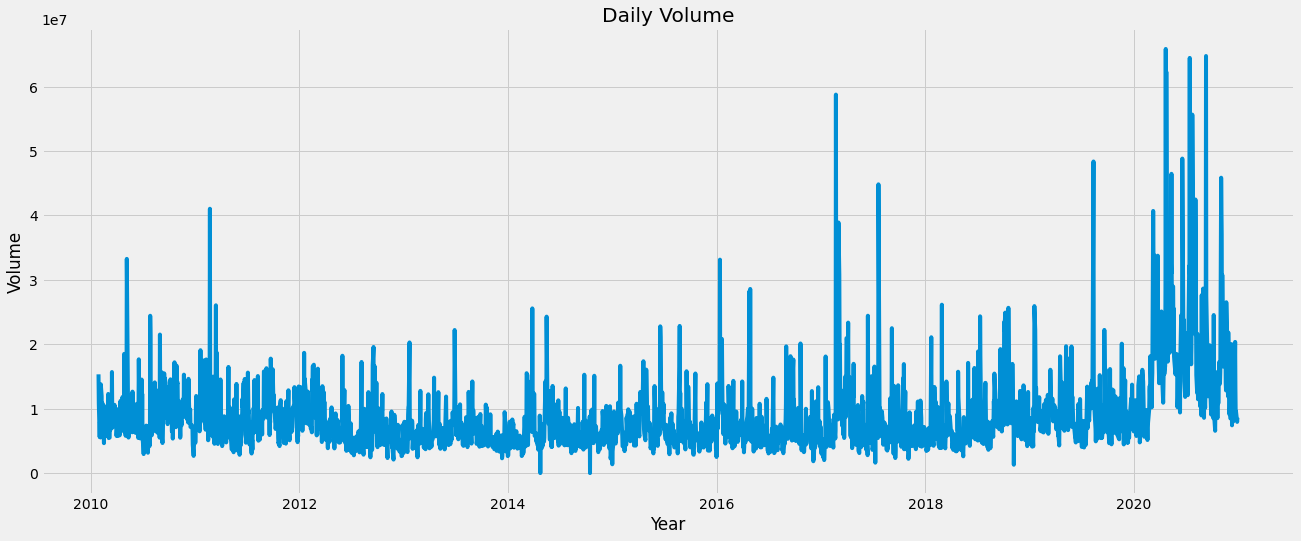

In [14]:
fig, ax = plt.subplots(figsize=(20, 8))
ax.set_title("Daily Volume")
ax.set_xlabel("Year")
ax.set_ylabel("Volume")
sns.lineplot(df.index, df['Volume'] )

#**Time Series Decomposition**
**Seasonal Component:**  Shows the recurring "normal" variations i.e. the ups and downs of time-series data.

**Trend Component:** This shows the pattern in the data that spans across seasonal periods.

**Residual Component:** After Decomposition of Time Series into Trend & Seasonal Component, what's leftover becomes the Residual.

Text(0.5, 0.98, 'Open decomposition')

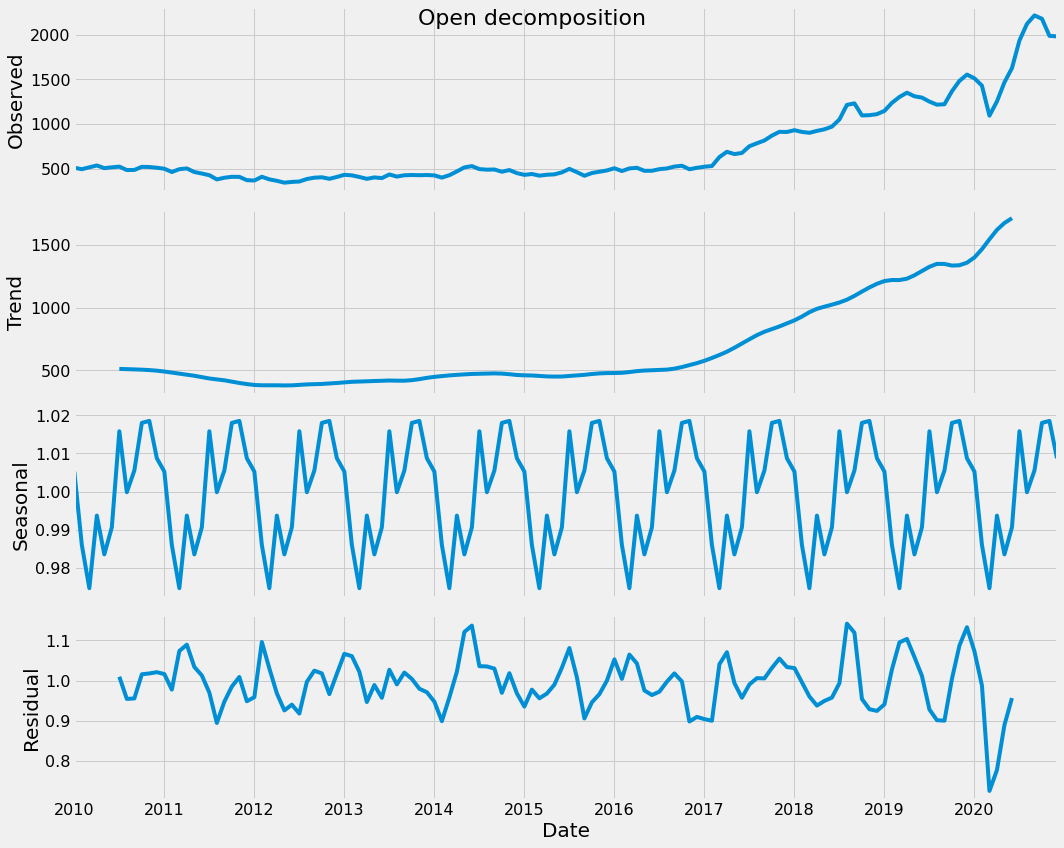

In [15]:
df['Date'] = pd.to_datetime(df.index)
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

plt.style.use("fivethirtyeight")


y = df[['Date','Open']].copy()
y.set_index('Date', inplace=True)
y.index = pd.to_datetime(y.index)
y = y.resample("1M").mean()

rcParams['figure.figsize'] = 15, 12
rcParams['axes.labelsize'] = 20
rcParams['ytick.labelsize'] = 16
rcParams['xtick.labelsize'] = 16

decomposition = sm.tsa.seasonal_decompose(y, model='multiplicative', freq = 12)
decomp = decomposition.plot()
decomp.suptitle('Open decomposition', fontsize=22)

#**ReSampling**
To observe annual trends and monthly trends and extract important features

In [28]:
#Sampling of Time Series
df_sampled = df.resample("BM").mean()
df_sampled

,High,Low,Open,Close,Volume,Adj Close,Year,Month
Date,,,,,,,,
2010-01-29,519.636871,505.978821,513.358856,515.946838,1.305041e+07,470.544540,2010,1
2010-02-26,503.005692,491.311283,497.312293,495.586549,7.885949e+06,451.975926,2010,2
2010-03-31,525.486770,513.697328,518.651562,519.379184,9.221845e+06,473.674838,2010,3
2010-04-30,545.262704,532.003389,538.988425,537.077791,8.699144e+06,489.816020,2010,4
2010-05-31,516.560662,502.288805,508.828006,509.549739,1.045308e+07,467.132022,2010,5
...,...,...,...,...,...,...,...,...
2020-08-31,2141.488084,2084.204793,2118.407151,2110.792899,1.825029e+07,2110.792899,2020,8
2020-09-30,2244.511364,2185.736384,2213.488636,2214.381836,1.721645e+07,2214.381836,2020,9
2020-10-30,2197.745233,2143.111904,2175.769049,2161.842855,1.237273e+07,2161.842855,2020,10


#**Auto Correlation**
An Autocorrelation Plot tells us how the current value of the time-series data is related to the previous values by considering trend, seasonality, cyclic and residual.

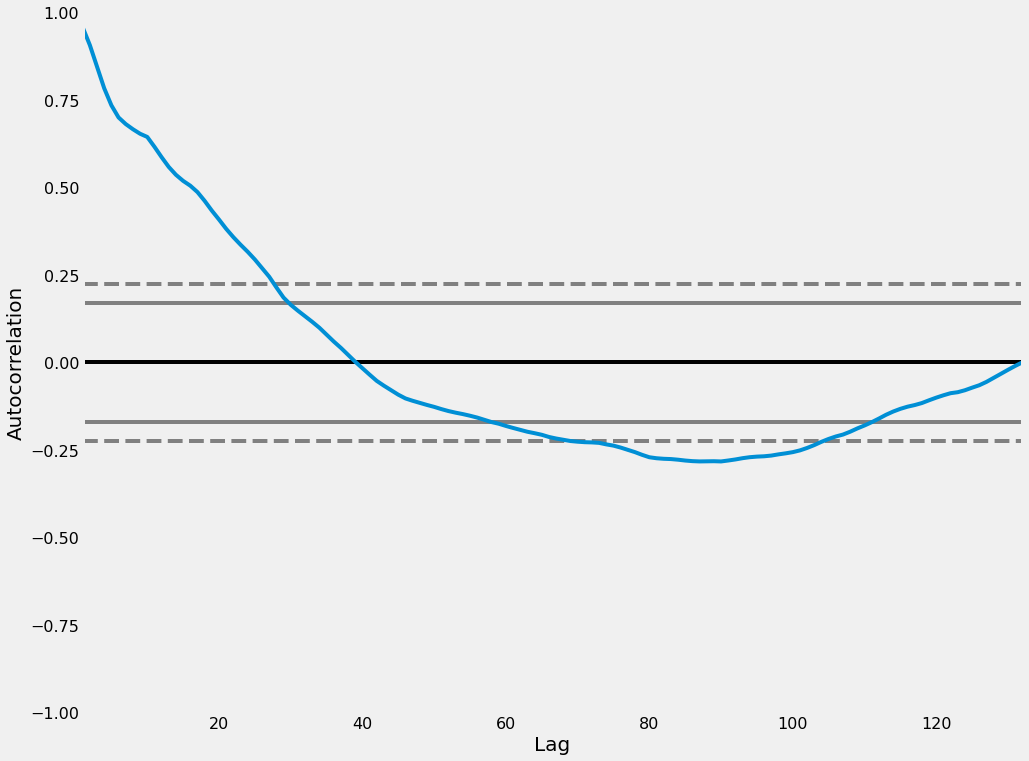

In [31]:
#Autocorrelation Plot
autocorrelation_plot(df_sampled["Close"])

#**Seasonal Variation**

In [32]:
# Date Split Up
df['Date'] = pd.to_datetime(df.index)
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


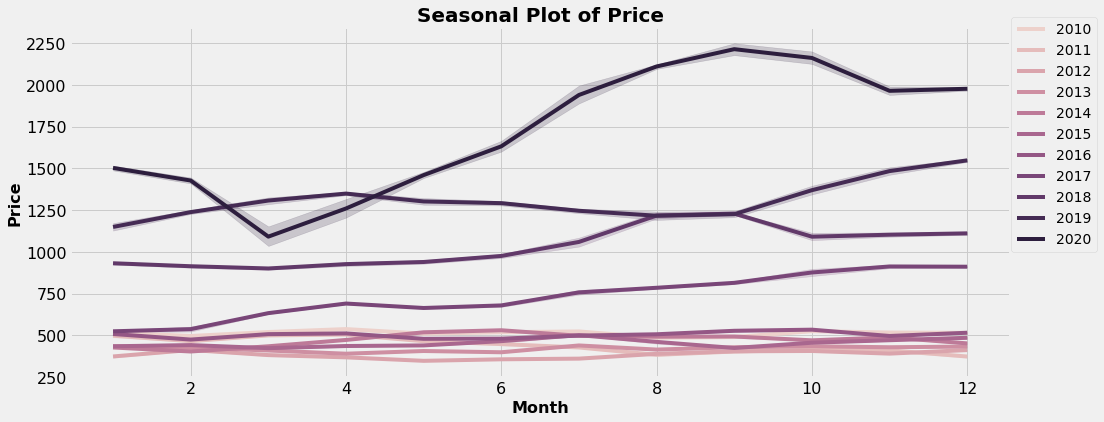

In [33]:
variable = 'Close'
fig, ax = plt.subplots(figsize=(15, 6))

sns.lineplot(df['Month'], df[variable], hue = df['Year'])
ax.set_title('Seasonal Plot of Price', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax.set_xlabel('Month', fontsize = 16, fontdict=dict(weight='bold'))
ax.set_ylabel('Price', fontsize = 16, fontdict=dict(weight='bold'))
ax.legend(labels = [str(2010+i) for i in range(11)], bbox_to_anchor=(1.1, 1.05))

#**Box Plot - To Depict Trend and Seasonality**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


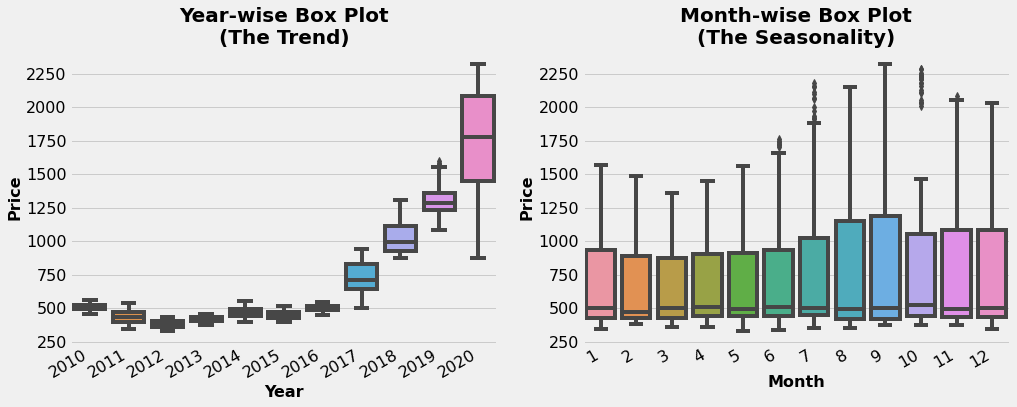

In [35]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

sns.boxplot(df['Year'], df[variable], ax=ax[0])
ax[0].set_title('Year-wise Box Plot\n(The Trend)', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax[0].set_xlabel('Year', fontsize = 16, fontdict=dict(weight='bold'))
ax[0].set_ylabel('Price', fontsize = 16, fontdict=dict(weight='bold'))

sns.boxplot(df['Month'], df[variable], ax=ax[1])
ax[1].set_title('Month-wise Box Plot\n(The Seasonality)', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax[1].set_xlabel('Month', fontsize = 16, fontdict=dict(weight='bold'))
ax[1].set_ylabel('Price', fontsize = 16, fontdict=dict(weight='bold'))

fig.autofmt_xdate()